In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Read file and have a quick scan of data
ecommerce_retail_data = pd.read_excel('C:\\Users\\ADMIN\\Desktop\\Python\\Project_3\\Final_project_RFM\\ecommerce_retail.xlsx')
ecommerce_retail_segment = pd.read_excel('C:\\Users\\ADMIN\\Desktop\\Python\\Project_3\\Final_project_RFM\\ecommerce_retail.xlsx', sheet_name='Segmentation')
print(ecommerce_retail_data.head())
print(' ')
print(ecommerce_retail_segment.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 
              Segment                                          RFM Score
0           Champions                  555, 554, 544, 545, 454, 455, 445
1               Loyal             543, 44

In [3]:
#Check Duplicate
print("duplicate count: " + str(ecommerce_retail_data.duplicated(subset=["InvoiceNo", "StockCode","InvoiceDate","CustomerID"]).sum()))


duplicate count: 10677


In [4]:
#Remove Duplicate
ecommerce_retail_data = ecommerce_retail_data.drop_duplicates(subset=["InvoiceNo", "StockCode","InvoiceDate","CustomerID"])
print("duplicate count after remove: " + str(ecommerce_retail_data.duplicated(subset=["InvoiceNo", "StockCode","InvoiceDate","CustomerID"]).sum()))

duplicate count after remove: 0


In [5]:
#Check and Remove NA
print('Na count')
print(ecommerce_retail_data.isna().sum())
ecommerce_retail_data= ecommerce_retail_data.dropna(subset='CustomerID')



Na count
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134546
Country             0
dtype: int64


In [6]:
#Remove NA
print('Na count after remove')
print(ecommerce_retail_data.isna().sum())

Na count after remove
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [7]:
#Change ecommerce_retail_data Data Type
print('ecommerce_retail_data data type')
ecommerce_retail_data['CustomerID'] = ecommerce_retail_data['CustomerID'].astype('string')
ecommerce_retail_data['InvoiceNo'] = ecommerce_retail_data['InvoiceNo'].astype('string')
ecommerce_retail_data['StockCode'] = ecommerce_retail_data['StockCode'].astype('string')
ecommerce_retail_data['Description'] = ecommerce_retail_data['Description'].astype('string')
ecommerce_retail_data['Country'] = ecommerce_retail_data['Country'].astype('string')
print(ecommerce_retail_data.dtypes)


ecommerce_retail_data data type
InvoiceNo      string[python]
StockCode      string[python]
Description    string[python]
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country        string[python]
dtype: object


In [8]:
#Change ecommerce_retail_segment Data Type
print('ecommerce_retail_segment data type')
ecommerce_retail_segment['RFM Score'] = ecommerce_retail_segment['RFM Score'].astype('string')
print(ecommerce_retail_segment.dtypes)

ecommerce_retail_segment data type
Segment              object
RFM Score    string[python]
dtype: object


In [9]:
#Remove outlier using IQR for ecommerce_retail_data
ecommerce_retail_data= ecommerce_retail_data[ecommerce_retail_data['Quantity'] > 0]
#Quantity IQR 
seventy_fifth = ecommerce_retail_data['Quantity'].quantile(0.75)
twenty_fifth = ecommerce_retail_data['Quantity'].quantile(0.25)
Quantity_iqr = seventy_fifth - twenty_fifth
Quantity_upper = seventy_fifth + (1.5 * Quantity_iqr)
Quantity_lower = twenty_fifth - (1.5 * Quantity_iqr)
#UnitPrice IQR 
seventy_fifth = ecommerce_retail_data['UnitPrice'].quantile(0.75)
twenty_fifth = ecommerce_retail_data['UnitPrice'].quantile(0.25)
UnitPrice_iqr = seventy_fifth - twenty_fifth
UnitPrice_upper = seventy_fifth + (1.5 * UnitPrice_iqr)
UnitPrice_lower = twenty_fifth - (1.5 * UnitPrice_iqr)
#Use IQR to filter Quantity, UnitPrice  outlier
ecommerce_retail_data = ecommerce_retail_data[(ecommerce_retail_data['UnitPrice']>UnitPrice_lower) & (ecommerce_retail_data['UnitPrice']<UnitPrice_upper) \
                                              & (ecommerce_retail_data['Quantity']>Quantity_lower) & (ecommerce_retail_data['Quantity']<Quantity_upper)]

print(ecommerce_retail_data.describe())

            Quantity                    InvoiceDate      UnitPrice
count  327982.000000                         327982  327982.000000
mean        7.612979  2011-07-12 03:57:18.824752384       2.190757
min         1.000000            2010-12-01 08:26:00       0.000000
25%         2.000000            2011-04-08 08:20:00       1.250000
50%         6.000000            2011-08-02 14:04:00       1.650000
75%        12.000000            2011-10-21 13:24:00       2.950000
max        26.000000            2011-12-09 12:50:00       7.460000
std         6.792468                            NaN       1.533964


In [10]:
#Caculate cusotmer spend
ecommerce_retail_data['Spend'] = ecommerce_retail_data['Quantity'] * ecommerce_retail_data['UnitPrice']

#Caculate R, F, M
RFM = ecommerce_retail_data.groupby('CustomerID').agg( Recency =('InvoiceDate', lambda x: (pd.to_datetime('2011-12-31') - x.max()).days) \
                                                      ,Frequency =('CustomerID', lambda x: x.count()) \
                                                      ,Monetary =('Spend', lambda x: x.sum())
                                                       ).reset_index()

#caculate R, F, M IQR
seventy_fifth = RFM['Recency'].quantile(0.75)
twenty_fifth = RFM['Recency'].quantile(0.25)
Recency_iqr = seventy_fifth - twenty_fifth
Recency_upper = seventy_fifth + (1.5 * Recency_iqr)
Recency_lower = twenty_fifth - (1.5 * Recency_iqr)

seventy_fifth = RFM['Frequency'].quantile(0.75)
twenty_fifth = RFM['Frequency'].quantile(0.25)
Frequency_iqr = seventy_fifth - twenty_fifth
Frequency_upper = seventy_fifth + (1.5 * Frequency_iqr)
Frequency_lower = twenty_fifth - (1.5 * Frequency_iqr)

seventy_fifth = RFM['Monetary'].quantile(0.75)
twenty_fifth = RFM['Monetary'].quantile(0.25)
Monetary_iqr = seventy_fifth - twenty_fifth
Monetary_upper = seventy_fifth + (1.5 * Monetary_iqr)
Monetary_lower = twenty_fifth - (1.5 * Monetary_iqr)

#Use IQR to filter R, F, M outlier  
RFM_remove_outliner = RFM[
                           (RFM['Recency'] > Recency_lower) & (RFM['Recency'] < Recency_upper) &
                           (RFM['Frequency'] > Frequency_lower) & (RFM['Frequency'] < Frequency_upper) &
                           (RFM['Monetary'] > Monetary_lower)& (RFM['Monetary'] < Monetary_upper)
                                ]
#Sort R, F, M
RFM_remove_outliner = RFM_remove_outliner.sort_values(['Recency','Frequency','Monetary'], ascending=(True, False, False))

#USe qcut to Score R,F,M
RFM_remove_outliner['Recency_Score'] = 6 - (pd.qcut(RFM_remove_outliner['Recency'], 5,labels=False) + 1)
RFM_remove_outliner['Frequency_Score'] = pd.qcut(RFM_remove_outliner['Frequency'], 5,labels=False) + 1
RFM_remove_outliner['Monetary_Score'] = pd.qcut(RFM_remove_outliner['Monetary'], 5,labels=False) + 1

#Megre R,F,M into RFM_Score column
RFM_remove_outliner['RFM_Score'] = RFM_remove_outliner['Recency_Score'].astype(str) + RFM_remove_outliner['Frequency_Score'].astype(str) + RFM_remove_outliner['Monetary_Score'].astype(str)
RFM_remove_outliner['RFM_Score'] = RFM_remove_outliner['RFM_Score'].astype(int)
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)
print(RFM_remove_outliner)



     CustomerID  Recency  Frequency  Monetary  Recency_Score  Frequency_Score  Monetary_Score  RFM_Score
3039    16626.0       21        129   2337.14              5                5               5        555
136     12518.0       21        114   1750.09              5                5               5        555
60      12423.0       21        111   1535.61              5                5               5        555
3829    17754.0       21         76    970.88              5                5               5        555
143     12526.0       21         63   1074.46              5                4               5        545
...         ...      ...        ...       ...            ...              ...             ...        ...
2208    15447.0      351          8    129.67              1                1               1        111
1963    15107.0      351          8    104.10              1                1               1        111
248     12652.0      352         44    732.28          

In [11]:
#Split the RFM Score column in ecommerce_retail_segment
ecommerce_retail_segment['RFM Score'] = ecommerce_retail_segment['RFM Score'].astype(str).str.split(',')
ecommerce_retail_segment = ecommerce_retail_segment.explode('RFM Score').reset_index(drop=True)
ecommerce_retail_segment['RFM Score'] = ecommerce_retail_segment['RFM Score'].astype(int)

print(ecommerce_retail_segment)

#Merge RFM_remove_outliner and ecommerce_retail_segment to get customer Segment 
Customer_Segment = RFM_remove_outliner.merge(ecommerce_retail_segment, left_on = 'RFM_Score', right_on='RFM Score', how= 'inner')   
Customer_Segment = Customer_Segment.drop(columns='RFM Score')     
Customer_Segment = Customer_Segment.drop_duplicates('CustomerID')
print(Customer_Segment)



            Segment  RFM Score
0         Champions        555
1         Champions        554
2         Champions        544
3         Champions        545
4         Champions        454
..              ...        ...
120  Lost customers        112
121  Lost customers        121
122  Lost customers        131
123  Lost customers        141
124  Lost customers        151

[125 rows x 2 columns]
     CustomerID  Recency  Frequency  Monetary  Recency_Score  Frequency_Score  Monetary_Score  RFM_Score                Segment
0       16626.0       21        129   2337.14              5                5               5        555              Champions
1       12518.0       21        114   1750.09              5                5               5        555              Champions
2       12423.0       21        111   1535.61              5                5               5        555              Champions
3       17754.0       21         76    970.88              5                5               

In [12]:
#Create Segment_list for sorting 
segment_list = [
'Champions'
,'Loyal'
,'Potential Loyalist'
,'New Customers'
,'Promising'
,'Need Attention'
,'About To Sleep'
,'At Risk'
,'Cannot Lose Them'
,'Hibernating customers'
,'Lost customers'
]

#Caculate min, mean, max of each segment
Customer_Segment_describe = Customer_Segment[['Segment','Recency','Frequency','Monetary']].groupby('Segment') \
                                                                                          .agg(['min', 'mean', 'max']).reset_index()
Customer_Segment_describe['Segment'] = pd.Categorical(Customer_Segment_describe['Segment'], categories=segment_list, ordered=True)
Customer_Segment_describe = Customer_Segment_describe.sort_values('Segment')
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 1000)
print(Customer_Segment_describe)

                  Segment Recency                  Frequency                 Monetary                       
                              min        mean  max       min       mean  max      min         mean       max
3               Champions      21   36.101724   60        41  93.839655  190   520.93  1324.029793  2473.040
6                   Loyal      23   67.459547   96        23  73.631068  188   308.58  1128.360812  2451.600
9      Potential Loyalist      22   54.027714   96        12  45.496536  183    20.92   341.838591   516.880
8           New Customers      22   51.854037   96         1   8.161491   22     0.00   136.531770   297.600
10              Promising      22   39.571429   96         3  15.008929   22    78.20   385.903661  1357.740
7          Need Attention      21   56.386957   96        13  36.391304   71   299.40   635.515435  2439.260
0          About To Sleep      61  108.080645  198         2  16.870968   64    33.17   157.577992   471.300
1                 A

In [13]:
#Count customer by segment
Groupby_segment = Customer_Segment.groupby('Segment')['Segment'].count().reset_index(name= 'Segment_count')
Groupby_segment['Segment'] = pd.Categorical(Groupby_segment['Segment'], categories=segment_list,ordered=True)
Groupby_segment = Groupby_segment.sort_values('Segment')
Groupby_segment['Percent_by_segment'] = ((Groupby_segment['Segment_count']/Groupby_segment['Segment_count'].sum())*100).round(2)
print(Groupby_segment)

                  Segment  Segment_count  Percent_by_segment
3               Champions            580               16.40
6                   Loyal            309                8.74
9      Potential Loyalist            433               12.25
8           New Customers            322                9.11
10              Promising            112                3.17
7          Need Attention            230                6.50
0          About To Sleep            124                3.51
1                 At Risk            428               12.10
2        Cannot Lose Them             63                1.78
4   Hibernating customers            614               17.36
5          Lost customers            321                9.08


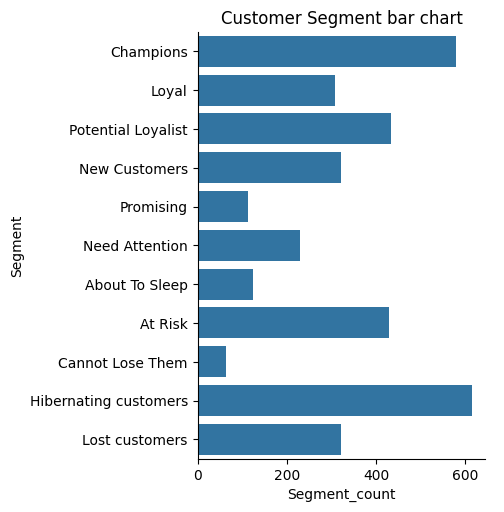

In [14]:
#Create bar plot
sns.catplot(data=Groupby_segment, y='Segment', x='Segment_count', kind= 'bar',errorbar=None, order = segment_list)
plt.title('Customer Segment bar chart')
plt.show()

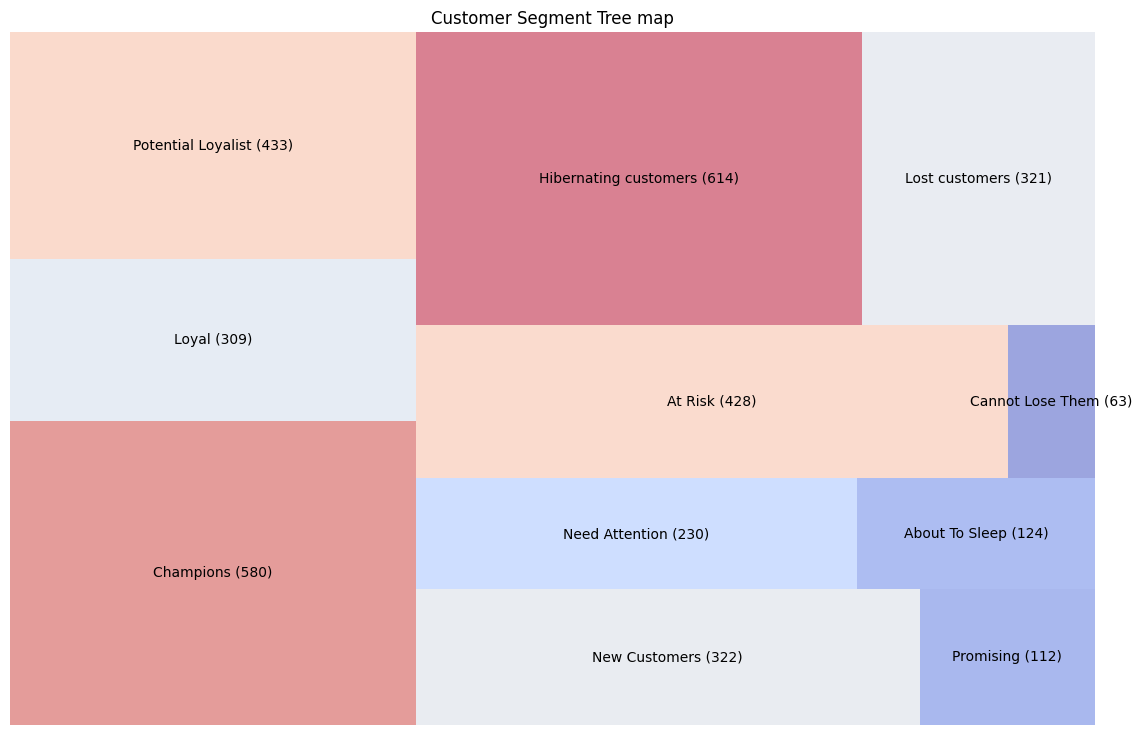

In [15]:

#Create Treemap
import squarify
import matplotlib.colors as mcolors

sizes = Groupby_segment['Segment_count']
labels = Groupby_segment['Segment'].astype(str) + ' (' + Groupby_segment['Segment_count'].astype(str) + ')'

cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=min(sizes), vmax=max(sizes)) 
colors = [cmap(norm(value)) for value in sizes]

plt.figure(figsize=(14, 9))
squarify.plot(sizes=sizes, label=labels, alpha=0.5, color=colors)
plt.axis('off')
plt.title('Customer Segment Tree map')
plt.show()

In [16]:
# Context
    # SuperStore is a global retail company with a large customer base.
    # The Marketing department wants to run campaigns to show appreciation to customers and identify potential loyal customers for Christmas and New Year.
    # Due to the large dataset, manual segmentation is no longer doable. They have requested the Data Analysis team to implement customer segmentation 
    # using the RFM model and Python, as Excel is insufficient for handling such large data.

# Requirement 
    # Analyze the company's current state and provide recommendations for the Marketing team.
    # For the Marketing and Sales teams of Superstore's retail model, which of the three metrics R, F, M should they focus on the most?

# recommendations
    # Analyze the company's current state
        # The proportion of 'Champions' customers is 16.40%, but 'At Risk' (12.10%) and 'Hibernating' (17.36%) customers are also significant. 
        # Despite having valuable customers, the high customer loss rate indicates the need for targeted strategies for 'At Risk' customers. 
        # The large 'Hibernating' segment shows a high churn rate, requiring a review of customer care and retention strategies.

    # which of the three metrics R, F, M should they focus on the most? 
        # In Superstore's retail model, Recency (R) and Frequency (F) are the key metrics to prioritize. 
        # 'Champions' have an average recency of 36 days and 'Loyal' customers around 67 days, indicating they return within 1-2 months. 
        # Additionally, 'Champions' make 93 purchases, and 'Loyal' customers make about 73 purchases in 1-2 months.
        # This shows that customers with low Recency and high Frequency bring significant value to the company, so these metrics should be prioritized for customer segmentation.

    # Addition
        # For a customer appreciation campaign, focus on: 'Champions', 'Loyal', and 'Potential Loyalist' customers. 
        # For identifying potential customers, focus on: 'New Customers' and 'Promising'. 
        # Apart from the mentioned customer segments, other segments should have tailored campaigns and care strategies to prevent an increase in churn rate.


